In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, transforms, models
import torch.optim as optim
from torchsummary import summary
import pytorch_lightning as pl
from torch.utils.tensorboard import SummaryWriter
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from PIL import Image
import math
import os

# Tensors

In [2]:
# Create a NumPy array
numpy_array = np.array([1.0, 2.0, 3.0, 4.0])

# Convert the NumPy array to a PyTorch tensor
tensor = torch.tensor(numpy_array)

print(tensor)

# Convert the PyTorch tensor to a NumPy array
numpy_array_back = tensor.numpy()

print(numpy_array_back, type(numpy_array_back))

tensor([1., 2., 3., 4.], dtype=torch.float64)
[1. 2. 3. 4.] <class 'numpy.ndarray'>


In [3]:
x = torch.randn(4, 4)

if torch.cuda.is_available():
    device = torch.device("cuda")          # a CUDA device object
    y = torch.ones_like(x, device=device)  # directly create a tensor on GPU
    x = x.to(device)                       # or just use strings ``.to("cuda")``
    z = x + y
    # z = z.numpy() # not possible because numpy cannot handle GPU tenors
    # move to CPU again
    z.to("cpu")       # ``.to`` can also change dtype together!
    # z = z.numpy()
    print(z)

tensor([[ 1.4505, -0.1259,  1.6659,  2.1306],
        [ 1.1355,  1.5116,  1.9068,  0.1257],
        [ 1.0649,  1.7122,  1.9140,  1.4020],
        [ 0.2198,  2.6297,  1.2396,  1.5478]], device='cuda:0')


#### 1- Math Operations

In [4]:
import torch

# PyTorch tensors
a = torch.tensor([1, 2, 3], dtype=torch.float32)
b = torch.tensor([4, 5, 6], dtype=torch.float32)

# PyTorch operations
add = torch.add(a, b)
subtract = torch.subtract(a, b)
multiply = torch.multiply(a, b)
divide = torch.divide(a, b)

print("Add:", add)
print("Subtract:", subtract)
print("Multiply:", multiply)
print("Divide:", divide)

# Broadcasting in PyTorch
c = torch.tensor([1, 2, 3], dtype=torch.float32)
d = torch.tensor(2.0, dtype=torch.float32)
broadcast_mul = torch.multiply(c, d)

print("Broadcasting Multiplication:", broadcast_mul)

Add: tensor([5., 7., 9.])
Subtract: tensor([-3., -3., -3.])
Multiply: tensor([ 4., 10., 18.])
Divide: tensor([0.2500, 0.4000, 0.5000])
Broadcasting Multiplication: tensor([2., 4., 6.])


In [6]:
a = torch.tensor([1, 2, 3], dtype=torch.float32)

# PyTorch tensor creation functions
ones = torch.ones([2, 3])
zeros = torch.zeros([2, 3])
ones_like = torch.ones_like(a)
zeros_like = torch.zeros_like(a)
random_floats = torch.rand([2, 3])  # Random floats between 0 and 1
random_ints = torch.randint(0, 10, [2, 3])  # Random integers between 0 and 10

print("Ones:", ones, "\n")
print("Zeros:", zeros, "\n")
print("Ones like:", ones_like, "\n")
print("Zeros like:", zeros_like, "\n")
print("Random floats:", random_floats, "\n")
print("Random ints:", random_ints)

Ones: tensor([[1., 1., 1.],
        [1., 1., 1.]]) 

Zeros: tensor([[0., 0., 0.],
        [0., 0., 0.]]) 

Ones like: tensor([1., 1., 1.]) 

Zeros like: tensor([0., 0., 0.]) 

Random floats: tensor([[0.1130, 0.0577, 0.5929],
        [0.8912, 0.3472, 0.1569]]) 

Random ints: tensor([[0, 6, 3],
        [5, 3, 7]])


#### 2- Matrix Operations

In [7]:
import torch

# Define the matrices
matrix1 = torch.tensor([[1, 2], [3, 4]], dtype=torch.float32)
matrix2 = torch.tensor([[5, 6], [7, 8]], dtype=torch.float32)

# Matrix multiplication
matmul = torch.matmul(matrix1, matrix2)

# Transpose
transpose = torch.transpose(matrix1, 0, 1)

# Inverse (Only if the matrix is invertible)
inverse = torch.inverse(matrix1)

print("Matrix Multiplication:\n", matmul)
print("Transpose:\n", transpose)
print("Inverse:\n", inverse)

Matrix Multiplication:
 tensor([[19., 22.],
        [43., 50.]])
Transpose:
 tensor([[1., 3.],
        [2., 4.]])
Inverse:
 tensor([[-2.0000,  1.0000],
        [ 1.5000, -0.5000]])


#### 3- Reduction Operations

In [8]:
c = torch.tensor([1, 2, 3, 4, 5], dtype=torch.float32)

sum_c = torch.sum(c)
mean_c = torch.mean(c)
max_c = torch.max(c)

print("Sum:", sum_c)
print("Mean:", mean_c)
print("Max:", max_c)

Sum: tensor(15.)
Mean: tensor(3.)
Max: tensor(5.)


#### 4- Reshaping Operations

In [11]:
tensor = torch.tensor([[1, 2, 3], [4, 5, 6]], dtype=torch.float32)
#print(tensor[1,1].item()) # element at 1, 1

reshaped_tensor1 = torch.reshape(tensor, (3, 2))
reshaped_tensor2 = tensor.reshape(-1, 2)
flattened_tensor = tensor.view(-1)
expanded_tensor = torch.unsqueeze(tensor, 0)
squeezed_tensor = torch.squeeze(expanded_tensor)

# Reshape the tensor using view
# Generally faster because it avoids copying data if the tensor is already contiguous.
if not tensor.is_contiguous():
    tensor = tensor.contiguous()
reshaped_tensor_view = tensor.view(3, 2)

print("Original Tensor:\n", tensor)
print("Reshaped Tensor:\n", reshaped_tensor1)
print("Reshaped Tensor using -1:\n", reshaped_tensor2)
print("Flattened Tensor:\n", flattened_tensor)
print("Expanded Tensor:\n", expanded_tensor)
print("Squeezed Tensor:\n", squeezed_tensor)
print("Reshaped Tensor using view:\n", reshaped_tensor_view)

Original Tensor:
 tensor([[1., 2., 3.],
        [4., 5., 6.]])
Reshaped Tensor:
 tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])
Reshaped Tensor using -1:
 tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])
Flattened Tensor:
 tensor([1., 2., 3., 4., 5., 6.])
Expanded Tensor:
 tensor([[[1., 2., 3.],
         [4., 5., 6.]]])
Squeezed Tensor:
 tensor([[1., 2., 3.],
        [4., 5., 6.]])
Reshaped Tensor using view:
 tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])


# Autograd

#### 1- Computing Gradients:

In [16]:
x = torch.randn(3, requires_grad=True)
y = x + 2
print(x)          # Created by the user -> grad_fn is None
print(y)          # Created as a result of an operation -> has grad_fn
print(y.grad_fn)  # grad_fn references a Function that created the Tensor

tensor([ 0.8394, -0.0679, -1.1209], requires_grad=True)
tensor([2.8394, 1.9321, 0.8791], grad_fn=<AddBackward0>)


In [19]:
x = torch.randn(3, requires_grad=True)
y = x + 2
z = y * y * 3
print(z)
z = z.mean()      # z = (1/len(x)) * sum( 3 * (x+2)**2 )
print(z)
z.backward()
print(x.grad)     # dz/dx

tensor([15.8982, 20.9032,  2.9713], grad_fn=<MulBackward0>)
tensor(13.2576, grad_fn=<MeanBackward0>)
tensor([4.6041, 5.2793, 1.9904])


In [20]:
# If a Tensor is non-scalar, a gradient argument, which is a tensor of matching shape,
# is needed for backward() to calculate the vector-Jacobian product.
x = torch.randn(3, requires_grad=True)
y = x * 2
v = torch.tensor([0.1, 1.0, 0.0001], dtype=torch.float32)
y.backward(v)
print(x.grad)

tensor([2.0000e-01, 2.0000e+00, 2.0000e-04])


#### 2- Stopping Gradient Tracking

In [21]:
# For example, during the training loop, the weights must be updated, and this update shouldn't be part of the gradient computation.
# 1- x.requires_grad_(False)
# 2- x.detach()
# 3- wrap in 'with torch.no_grad():'

# Example with .requires_grad_(False)
a = torch.randn(2, 2)
print(a.requires_grad)  # False by default
b = ((a * 3) / (a - 1))
print(b.grad_fn)        # None, as requires_grad=False
a.requires_grad_(True)  # Change requires_grad to True in-place
print(a.requires_grad)
b = (a * a).sum()
print(b.grad_fn)        # Has grad_fn as requires_grad=True

# Example with .detach()
a = torch.randn(2, 2, requires_grad=True)
print(a.requires_grad)  # True
b = a.detach()          # Create a new tensor detached from the computation graph
print(b.requires_grad)  # False

# Example with no_grad
a = torch.randn(2, 2, requires_grad=True)
print(a.requires_grad)  # True
with torch.no_grad():
    print((a ** 2).requires_grad)  # False inside the no_grad context

False
None
True
True
False
True
False


#### 3- Setting the gradients to zero before a new optimization step to prevent accumulation

In [25]:
weights = torch.ones(4, requires_grad=True)

print("if the gradients are not set to zero before a new optimization step:")
for epoch in range(3):
    # Dummy model output
    model_output = (weights * 3).sum()
    model_output.backward()  # Compute gradients
    print(weights.grad)      # Print gradients

    # Update weights without tracking gradients
    with torch.no_grad():
        weights -= 0.1 * weights.grad

    # Zero gradients before the next step
    #weights.grad.zero_()

print(weights)  # Final weights

print("\nif the gradients are set to zero before a new optimization step:")
for epoch in range(3):
    # Dummy model output
    model_output = (weights * 3).sum()
    model_output.backward()  # Compute gradients
    print(weights.grad)      # Print gradients

    # Update weights without tracking gradients
    with torch.no_grad():
        weights -= 0.1 * weights.grad

    # Zero gradients before the next step
    weights.grad.zero_()

print(weights)  # Final weights

if the gradients are not set to zero before a new optimization step:
tensor([3., 3., 3., 3.])
tensor([6., 6., 6., 6.])
tensor([9., 9., 9., 9.])
tensor([-0.8000, -0.8000, -0.8000, -0.8000], requires_grad=True)

if the gradients are set to zero before a new optimization step:
tensor([12., 12., 12., 12.])
tensor([3., 3., 3., 3.])
tensor([3., 3., 3., 3.])
tensor([-2.6000, -2.6000, -2.6000, -2.6000], requires_grad=True)


In [26]:
# Alternatively, use an optimizer which handles zeroing gradients automatically:
optimizer = torch.optim.SGD([weights], lr=0.1)

for epoch in range(3):
    optimizer.zero_grad()       # Zero the gradients
    model_output = (weights * 3).sum()
    model_output.backward()     # Compute gradients
    optimizer.step()            # Update weights

# Linear Regression

(100, 1)
(100,)
torch.Size([100, 1])
torch.Size([100, 1])
epoch: 20, loss = 2845.5068
epoch: 40, loss = 1479.7588
epoch: 60, loss = 844.3835
epoch: 80, loss = 548.5574
epoch: 100, loss = 410.7177


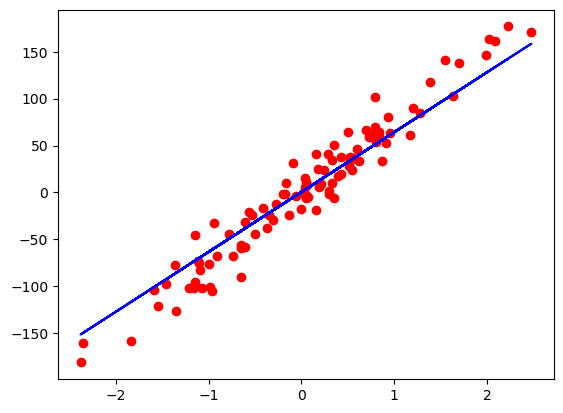

In [31]:
# 1) Prepare data
X_numpy, y_numpy = datasets.make_regression(n_samples=100, n_features=1, noise=20, random_state=4)
print(X_numpy.shape)
print(y_numpy.shape)

# cast to float Tensor
X = torch.from_numpy(X_numpy.astype(np.float32))
y = torch.from_numpy(y_numpy.astype(np.float32))
y = y.view(y.shape[0], 1)
print(X.shape)
print(y.shape)
n_samples, n_features = X.shape

# 2) Model
# Linear model f = wx + b
input_size = n_features
output_size = 1
model = nn.Linear(input_size, output_size)

# 3) Loss and optimizer
learning_rate = 0.01

criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)  

# 4) Training loop
num_epochs = 100
for epoch in range(num_epochs):
    # Forward pass and loss
    y_predicted = model(X)
    loss = criterion(y_predicted, y)
    
    # Backward pass and update
    loss.backward()
    optimizer.step()

    # zero grad before new step
    optimizer.zero_grad()

    if (epoch+1) % 20 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')

# Plot
predicted = model(X).detach().numpy()

plt.plot(X_numpy, y_numpy, 'ro')
plt.plot(X_numpy, predicted, 'b')
plt.show()

# Logistic Regression

In [34]:
# 1) Prepare data
bc = datasets.load_breast_cancer()
X, y = bc.data, bc.target
print(X.shape)
print(y.shape)

n_samples, n_features = X.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# feature scaling
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))
print(y_train.shape)

y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)

print(X_train.shape)
print(y_train.shape)

# 1) Model
# Linear model f = wx + b , sigmoid at the end
class Model(nn.Module):
    def __init__(self, n_input_features):
        super(Model, self).__init__()
        self.linear = nn.Linear(n_input_features, 1)

    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred

model = Model(n_features)

# 2) Loss and optimizer
num_epochs = 100
learning_rate = 0.01
criterion = nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

# 3) Training loop
for epoch in range(num_epochs):
    # Forward pass and loss
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)

    # Backward pass and update
    loss.backward()
    optimizer.step()

    # zero grad before new step
    optimizer.zero_grad()

    if (epoch+1) % 10 == 0:
        print(f'epoch: {epoch+1}, loss = {loss.item():.4f}')


with torch.no_grad():
    y_predicted = model(X_test)
    y_predicted_cls = y_predicted.round()
    acc = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0])
    print(f'accuracy: {acc.item():.4f}')

(569, 30)
(569,)
torch.Size([455])
torch.Size([455, 30])
torch.Size([455, 1])
epoch: 10, loss = 0.6769
epoch: 20, loss = 0.5549
epoch: 30, loss = 0.4774
epoch: 40, loss = 0.4237
epoch: 50, loss = 0.3839
epoch: 60, loss = 0.3531
epoch: 70, loss = 0.3283
epoch: 80, loss = 0.3079
epoch: 90, loss = 0.2907
epoch: 100, loss = 0.2759
accuracy: 0.8860


# DataLoader

#### 1- Using a Custom Dataset

In [42]:
class CustomDataset(Dataset):
    def __init__(self, data, labels):
        self.data = data
        self.labels = labels

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        sample = self.data[idx]
        label = self.labels[idx]
        return sample, label

# Example data
data = torch.randn(100, 5)  # 100 samples, 5 features each
labels = torch.randint(0, 2, (100,))  # Binary labels for each sample

# Create the custom dataset
dataset = CustomDataset(data, labels)

# Create the DataLoader
dataloader = DataLoader(dataset, batch_size=4, shuffle=True, num_workers=0)
# num_workers: Number of subprocesses to use for data loading. 0 means that the data will be loaded in the main process

#look at one random batch (4 samples)
dataiter = iter(dataloader)
data = next(dataiter)
features, labels = data
print(features, labels)

tensor([[-1.1632,  0.6966, -0.2905,  1.6074,  0.6407],
        [ 0.4497,  1.8617,  0.3717,  1.0773,  0.9609],
        [-1.2525, -0.8507,  0.2059, -0.7349,  1.4923],
        [-0.1021, -1.0003, -0.9364, -0.1793,  0.6685]]) tensor([1, 0, 0, 0])


#### 2- Using a downloaded dataset

In [45]:
train_dataset = torchvision.datasets.MNIST(root='./data', 
                                           train=True, 
                                           transform=torchvision.transforms.ToTensor(),  
                                           download=True)

train_loader = DataLoader(dataset=train_dataset, 
                                           batch_size=4, 
                                           shuffle=True)

# look at one random batch (4 samples)
dataiter = iter(train_loader)
data = next(dataiter)
inputs, targets = data
print(inputs.shape, targets.shape)

torch.Size([4, 1, 28, 28]) torch.Size([4])


## PyTorch Transforms

Transforms can be applied to PIL images, tensors, ndarrays, or custom data during the creation of the Dataset. These transforms help in preprocessing and augmenting the data to enhance the training process.

### Complete List of Built-in Transforms
For a comprehensive list of all built-in transforms, refer to the official PyTorch documentation:
[torchvision.transforms](https://pytorch.org/docs/stable/torchvision/transforms.html)

### On Images
The following transforms can be applied to images:

- `CenterCrop`: Crops the center of the image.
- `Grayscale`: Converts the image to grayscale.
- `Pad`: Pads the image with a specified value.
- `RandomAffine`: Applies random affine transformations.
- `RandomCrop`: Randomly crops the image.
- `RandomHorizontalFlip`: Randomly flips the image horizontally.
- `RandomRotation`: Randomly rotates the image.
- `Resize`: Resizes the image.
- `Scale`: Scales the image.

### On Tensors
The following transforms can be applied to tensors:

- `LinearTransformation`: Applies a linear transformation to the tensor.
- `Normalize`: Normalizes the tensor with mean and standard deviation.
- `RandomErasing`: Randomly erases a portion of the tensor.

### Conversion
Conversion transforms help in converting between different data types:

- `ToPILImage`: Converts a tensor or ndarray to a PIL image.
- `ToTensor`: Converts a numpy.ndarray or PIL image to a tensor.

### Generic
For more generic transformations, you can use:

- `Lambda`: Apply any user-defined lambda function.

### Custom
You can also write your own custom transform by defining a class:

```python
class CustomTransform:
    def __call__(self, sample):
        # Apply transformation
        return sample


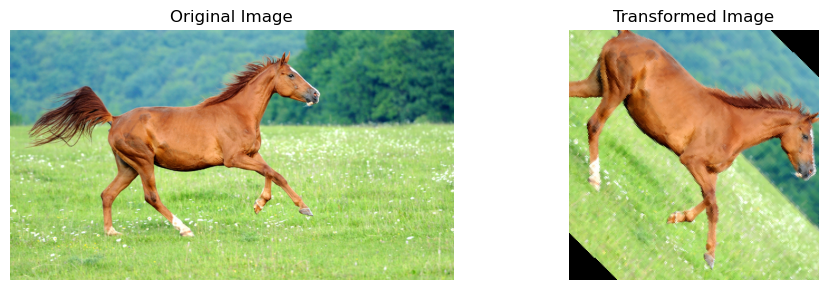

In [54]:
# Define a transformation pipeline
transform = transforms.Compose([
    transforms.Resize(256),
    transforms.RandomRotation(45),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Load an image
image = Image.open('images/horse.png').convert('RGB') 

# Apply the transformation
transformed_image = transform(image)

# Convert the transformed image back to a format suitable for visualization
transformed_image_np = transformed_image.permute(1, 2, 0).numpy()  # Convert tensor to numpy for visualization
# PyTorch tensors representing images typically have the shape (C, H, W),
# where C is the number of channels, H is the height, and W is the width.
# permute(1, 2, 0) reorders the dimensions of the tensor from (C, H, W) to (H, W, C).

transformed_image_np = transformed_image_np * [0.229, 0.224, 0.225] + [0.485, 0.456, 0.406]  # Unnormalize for display
transformed_image_np = np.clip(transformed_image_np, 0, 1)

# Plot the original and transformed images side by side
fig, axes = plt.subplots(1, 2, figsize=(10, 3))

axes[0].imshow(image)
axes[0].set_title('Original Image')
axes[0].axis('off')

axes[1].imshow(transformed_image_np)
axes[1].set_title('Transformed Image')
axes[1].axis('off')

plt.tight_layout()
plt.show()

# Multiclass classification on the MNIST dataset

#### 1- Load and process the data

In [32]:
# Check device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyperparameters
input_size = 784  # 28x28
num_classes = 10
num_epochs = 5
batch_size = 128
learning_rate = 0.001

# Transformations
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))  # Mean and std for MNIST
])

# MNIST dataset
train_dataset = torchvision.datasets.MNIST(root='mnist_data/', 
                               train=True, 
                               transform=transform, 
                               download=True)

test_dataset = torchvision.datasets.MNIST(root='mnist_data/', 
                              train=False, 
                              transform=transform)

# Data loader
train_loader = DataLoader(dataset=train_dataset, 
                          batch_size=batch_size, 
                          shuffle=True)

test_loader = DataLoader(dataset=test_dataset, 
                         batch_size=batch_size, 
                         shuffle=False)

writer = SummaryWriter('runs/mnist_experiment_1')  # Initialize TensorBoard

print(train_dataset)
print(test_dataset)

dataiter = iter(train_loader)
data = next(dataiter)
inputs, targets = data
print(inputs.shape, targets.shape)

Dataset MNIST
    Number of datapoints: 60000
    Root location: mnist_data/
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.1307,), std=(0.3081,))
           )
Dataset MNIST
    Number of datapoints: 10000
    Root location: mnist_data/
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.1307,), std=(0.3081,))
           )
torch.Size([128, 1, 28, 28]) torch.Size([128])


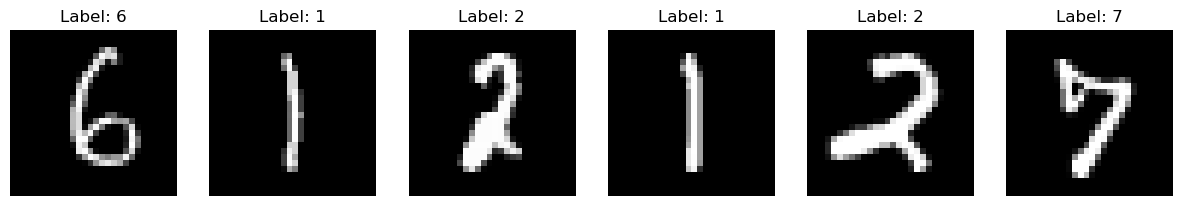

In [4]:
# Function to visualize samples
def visualize_samples(dataset, num_samples=6):
    # Get some random samples from the dataset
    indices = torch.randint(0, len(dataset), (num_samples,))
    samples = torch.utils.data.Subset(dataset, indices)
    
    # Plot the samples
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 15))
    for i, (image, label) in enumerate(samples):
        image = image.squeeze().numpy()
        axes[i].imshow(image, cmap='gray')
        axes[i].set_title(f'Label: {label}')
        axes[i].axis('off')
    plt.show()

# Visualize samples from the training dataset
visualize_samples(train_dataset)

In [ ]:
# Get some test images and write them to TensorBoard
examples = iter(test_loader)
example_data, example_targets = next(examples)

# Create a grid of images and log them
img_grid = torchvision.utils.make_grid(example_data)
writer.add_image('mnist_images', img_grid)

# Close the writer
writer.close()

#### 2- Build the model

In [5]:
# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, 128) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, num_classes)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        # no softmax at the end because the nn.CrossEntropyLoss() applies the softmax
        return out

model = NeuralNet(input_size, num_classes).to(device)

writer.add_graph(model, example_data.reshape(-1, 28*28).to(device))
writer.close()

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

#### 3- Train the model

In [6]:
def train_model(model, train_loader, criterion, optimizer, num_epochs, device):
    total_step = len(train_loader)
    for epoch in range(num_epochs):
        running_loss = 0.0
        running_correct = 0.0
        for i, (images, labels) in enumerate(train_loader):  
            images = images.reshape(-1, 28*28).to(device)   # (128, 784)
            labels = labels.to(device)                      # (128,)
            
            # Forward pass
            outputs = model(images)                         # (128, 10)
            loss = criterion(outputs, labels)
            
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            running_correct += (predicted == labels).sum().item()
            
            # Backward and optimize
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            if i % 100 == 99:  # log every 100 mini-batches
                writer.add_scalar('training loss', running_loss / 100, epoch * total_step + i)
                running_accuracy = running_correct / 100 / predicted.size(0)
                writer.add_scalar('training accuracy', running_accuracy, epoch * len(train_loader) + i)
                running_loss = 0.0
                running_correct = 0.0
            
        print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{total_step}], Loss: {loss.item():.4f}')
    writer.close()

# Train the model
train_model(model, train_loader, criterion, optimizer, num_epochs, device)

Epoch [1/5], Step [469/469], Loss: 0.1908
Epoch [2/5], Step [469/469], Loss: 0.0998
Epoch [3/5], Step [469/469], Loss: 0.0751
Epoch [4/5], Step [469/469], Loss: 0.0303
Epoch [5/5], Step [469/469], Loss: 0.0240


#### 4- Evaluate the model

In [10]:
# Evaluation function
def evaluate_model(model, test_loader, device):
    model.eval()  # sets the model to evaluation mode (no dropout, batchnorm, etc)
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in test_loader:
            images = images.reshape(-1, 28*28).to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        print(f'Accuracy of the model on the 10000 test images: {100 * correct / total:.2f}%')

# Evaluate the model
evaluate_model(model, test_loader, device)

Accuracy of the model on the 10000 test images: 97.36%


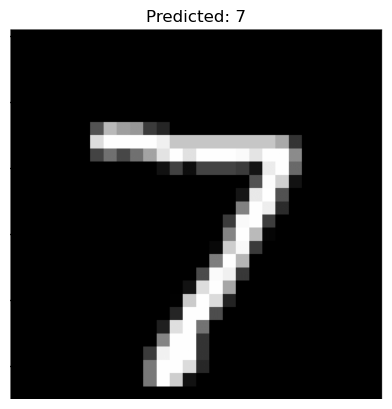

In [26]:
from tkinter import Tk
from tkinter.filedialog import askopenfilename

# Class names for CIFAR-10 dataset
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

# Ask the user to upload an image
root = Tk()
#root.withdraw()  # Hide the root window
initial_dir = os.getcwd()
filename = askopenfilename(initialdir=initial_dir, title='Select an image file', filetypes=[("Image files", "*.jpg;*.jpeg;*.png;*.webp")])
root.destroy()  # Close the Tkinter window

# Ensure to match these with the normalization parameters used during training
transform = transforms.Compose([
    transforms.Resize((28, 28)),  # Resize to match the input size of the network
    transforms.Grayscale(),       # Convert to grayscale
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))  # Mean and std for MNIST
])

# Load and preprocess the image
image = Image.open(filename).convert('RGB')  # Ensure image is RGB
transformed_image = transform(image)
transformed_image = transformed_image.unsqueeze(0).to(device)     # Add batch dimension and move to device
transformed_image = transformed_image.reshape(-1, 28*28)

model.eval()
with torch.no_grad():
    output = model(transformed_image)
    _, predicted = torch.max(output.data, 1)

predicted_label = class_names[predicted.item()]
    
# Display the image and the classification result
plt.imshow(image, cmap='gray')
plt.title(f'Predicted: {predicted_label}')
plt.axis('off')
plt.show()

# Callbacks

In [30]:
def save_checkpoint(model, epoch, path='checkpoint.pth'):
    torch.save({
        'epoch': epoch,
        'model_state_dict': model.state_dict(),
    }, path)
    print(f"Checkpoint saved at epoch {epoch}")

In [5]:
def early_stopping(loss, accuracy, loss_threshold, acc_threshold, patience, stop_counter):
    if loss < loss_threshold or accuracy > acc_threshold:
        stop_counter += 1
        if stop_counter >= patience:
            print("Early stopping triggered")
            return True, stop_counter
    else:
        stop_counter = 0
    return False, stop_counter

In [34]:
# Fully connected neural network with one hidden layer
class NeuralNet(nn.Module):
    def __init__(self, input_size, num_classes):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_size, 128) 
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(128, num_classes)
    
    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        # no softmax at the end because the nn.CrossEntropyLoss() applies the softmax
        return out

model = NeuralNet(input_size, num_classes).to(device)

# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [35]:
# Training function with callbacks
def train_model(model, train_loader, criterion, optimizer, num_epochs, device):
    model.to(device)
    stop_counter = 0
    patience = 3
    loss_threshold = 0.06
    acc_threshold = 0.98  # Example threshold for accuracy
    
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0
        
        for i, (images, labels) in enumerate(train_loader):
            images = images.view(-1, 28*28).to(device)
            labels = labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        
        avg_loss = running_loss / len(train_loader)
        accuracy = correct / total
        print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {avg_loss:.4f}, Accuracy: {accuracy:.4f}")

        # Callbacks
        #save_checkpoint(model, epoch)
        stop, stop_counter = early_stopping(avg_loss, accuracy, loss_threshold, acc_threshold, patience, stop_counter)
        if stop:
            break

train_model(model, train_loader, criterion, optimizer, num_epochs=10, device=device)

Epoch [1/10], Loss: 0.3011, Accuracy: 0.9131
Epoch [2/10], Loss: 0.1359, Accuracy: 0.9599
Epoch [3/10], Loss: 0.0938, Accuracy: 0.9724
Epoch [4/10], Loss: 0.0717, Accuracy: 0.9786
Epoch [5/10], Loss: 0.0560, Accuracy: 0.9831
Epoch [6/10], Loss: 0.0465, Accuracy: 0.9852
Epoch [7/10], Loss: 0.0363, Accuracy: 0.9890
Early stopping triggered


# Convolutional Neural Networks (CNNs)

In [76]:
# Device configuration
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Hyper-parameters 
num_epochs = 50
batch_size = 64
learning_rate = 0.001

# dataset has PILImage images of range [0, 1]. 
# We transform them to Tensors of normalized range [-1, 1]
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# CIFAR10: 60000 32x32 color images in 10 classes, with 6000 images per class
train_dataset = torchvision.datasets.CIFAR10(root='cifar10_data/', train=True,
                                        download=True, transform=transform)

test_dataset = torchvision.datasets.CIFAR10(root='cifar10_data/', train=False,
                                       download=True, transform=transform)

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size,
                                          shuffle=True)

test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=batch_size,
                                         shuffle=False)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

print(train_dataset)
print(test_dataset)

dataiter = iter(train_loader)
data = next(dataiter)
inputs, targets = data
print(inputs.shape, targets.shape)

Files already downloaded and verified
Files already downloaded and verified
Dataset CIFAR10
    Number of datapoints: 50000
    Root location: cifar10_data/
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )
Dataset CIFAR10
    Number of datapoints: 10000
    Root location: cifar10_data/
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Normalize(mean=(0.5, 0.5, 0.5), std=(0.5, 0.5, 0.5))
           )
torch.Size([64, 3, 32, 32]) torch.Size([64])


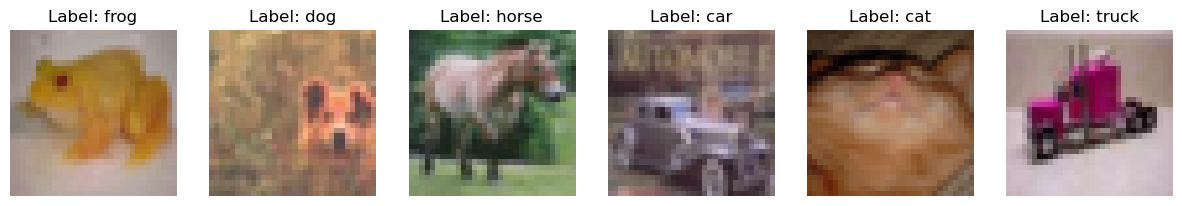

In [49]:
# Function to visualize samples
def visualize_samples(dataset, num_samples=6):
    # Get some random samples from the dataset
    indices = torch.randint(0, len(dataset), (num_samples,))
    samples = torch.utils.data.Subset(dataset, indices)
    
    # Plot the samples
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 15))
    for i, (image, label) in enumerate(samples):
        image = image.permute(1, 2, 0).numpy()  # Change shape from (C, H, W) to (H, W, C)
        image = image * [0.5, 0.5, 0.5] + [0.5, 0.5, 0.5]  # Unnormalize for display
        image = np.clip(image, 0, 1)
        label = classes[label]
        axes[i].imshow(image)
        axes[i].set_title(f'Label: {label}')
        axes[i].axis('off')
    plt.show()

# Assuming train_dataset is defined and loaded with CIFAR-10 dataset
visualize_samples(train_dataset)

# Output Shape and Padding Equations

### Parameters:
- **Input\_size**: Size of the input volume (height or width).
- **Padding**: Number of pixels added to each side of the input.
- **Dilation**: Spacing between kernel elements.
- **Kernel\_size**: Size of the convolution or pooling kernel.
- **Stride**: Number of pixels by which the filter or pooling window moves across the input.

## 1. Output Shape for Convolutional Layer
The output shape for a convolutional layer can be calculated using the following formula:

$$
\text{Output\_size} = \left\lfloor \frac{\text{Input\_size} + 2 \times \text{Padding} - \text{Dilation} \times (\text{Kernel\_size} - 1) - 1}{\text{Stride}} + 1 \right\rfloor
$$

## 2. Output Shape for Max Pooling Layer
The output shape for a max pooling layer can be calculated using the following formula:

$$
\text{Output\_size} = \left\lfloor \frac{\text{Input\_size} + 2 \times \text{Padding} - \text{Kernel\_size}}{\text{Stride}} \right\rfloor + 1
$$

## 3. Same Padding Calculation
To achieve "same" padding, where the output size is the same as the input size, the padding needed can be calculated using:

$$
\text{Padding} = \left( \frac{(\text{Stride} - 1) + \text{Dilation} \times (\text{Kernel\_size} - 1)}{2} \right)
$$


In [77]:
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        # Convolutional Layer 1
        self.layer1 = nn.Sequential(
            nn.Conv2d(in_channels=3, out_channels=32, kernel_size=3, padding=1),  # Output: (batch_size, 32, 32, 32)
            nn.BatchNorm2d(num_features=32),
            nn.ReLU(),
            nn.Dropout(0.2)  # Dropout with a probability of 0.25
        )
        self.layer2 = nn.Sequential(
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, padding=1),  # Output: (batch_size, 64, 32, 32)
            nn.BatchNorm2d(num_features=64),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),  # Output: (batch_size, 64, 16, 16)
            nn.Dropout(0.2)  # Dropout with a probability of 0.2
        )
        
        # Convolutional Layer 2
        self.layer3 = nn.Sequential(
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3),  # Output: (batch_size, 128, 14, 14)
            nn.BatchNorm2d(num_features=128),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),  # Output: (batch_size, 128, 7, 7)
            nn.Dropout(0.2),  # Dropout with a probability of 0.2
        )
        
        # Convolutional Layer 3
        self.layer4 = nn.Sequential(
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3),  # Output: (batch_size, 256, 5, 5)
            nn.BatchNorm2d(num_features=256),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),  # Output: (batch_size, 256, 2, 2)
            nn.Dropout(0.2)  # Dropout with a probability of 0.2
        )
        
        # Fully Connected Layers
        self.fc1 = nn.Linear(in_features=256 * 2 * 2, out_features=256)  # Output: (batch_size, 256)
        self.dropout1 = nn.Dropout(0.2)  # Dropout with a probability of 0.2
        self.fc2 = nn.Linear(in_features=256, out_features=128)  # Output: (batch_size, 128)
        self.dropout2 = nn.Dropout(0.2)  # Dropout with a probability of 0.2
        self.fc3 = nn.Linear(in_features=128, out_features=10)  # Output: (batch_size, 10)
    
    def forward(self, x):
        out = self.layer1(x)  # After layer1
        out = self.layer2(out)  # After layer2
        out = self.layer3(out)  # After layer3
        out = self.layer4(out)  # After layer4
        out = out.view(out.size(0), -1)  # Flatten: (batch_size, 256 * 2 * 2)
        out = self.fc1(out)  # After fc1
        out = self.dropout1(out)  # After dropout1
        out = self.fc2(out)  # After fc2
        out = self.dropout2(out)  # After dropout2
        out = self.fc3(out)  # After fc3
        return out


model = CNN().to(device)

# Display the model summary
summary(model, (3, 32, 32))

criterion = nn.CrossEntropyLoss()

optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate, weight_decay=1e-4)

# Decay LR by a factor of 0.1 every 7 epochs
#exp_lr_scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=7, gamma=0.1)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             896
       BatchNorm2d-2           [-1, 32, 32, 32]              64
              ReLU-3           [-1, 32, 32, 32]               0
           Dropout-4           [-1, 32, 32, 32]               0
            Conv2d-5           [-1, 64, 32, 32]          18,496
       BatchNorm2d-6           [-1, 64, 32, 32]             128
              ReLU-7           [-1, 64, 32, 32]               0
         MaxPool2d-8           [-1, 64, 16, 16]               0
           Dropout-9           [-1, 64, 16, 16]               0
           Conv2d-10          [-1, 128, 14, 14]          73,856
      BatchNorm2d-11          [-1, 128, 14, 14]             256
             ReLU-12          [-1, 128, 14, 14]               0
        MaxPool2d-13            [-1, 128, 7, 7]               0
          Dropout-14            [-1, 12

In [78]:
# Training function with callbacks
def train_model(model, train_loader, criterion, optimizer, num_epochs, device):
    model.to(device)
    stop_counter = 0
    patience = 3
    loss_threshold = 0.25
    acc_threshold = 0.90  # Example threshold for accuracy
    
    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0
        
        for i, (images, labels) in enumerate(train_loader):
            images = images.to(device)
            labels = labels.to(device)

            optimizer.zero_grad()
            outputs = model(images)
            loss = criterion(outputs, labels)
            loss.backward()
            optimizer.step()

            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            #if (i+1) % 100 == 0:
            #    print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')

        avg_loss = running_loss / len(train_loader)
        accuracy = correct / total
        print(f"Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {avg_loss:.4f}, Accuracy: {accuracy:.4f}")

        # Callbacks
        #save_checkpoint(model, epoch)
        stop, stop_counter = early_stopping(avg_loss, accuracy, loss_threshold, acc_threshold, patience, stop_counter)
        if stop:
            break

train_model(model, train_loader, criterion, optimizer, num_epochs=num_epochs, device=device)

Epoch [1/50], Step [782/782], Loss: 1.3643, Accuracy: 0.5075
Epoch [2/50], Step [782/782], Loss: 0.9956, Accuracy: 0.6506
Epoch [3/50], Step [782/782], Loss: 0.8668, Accuracy: 0.6983
Epoch [4/50], Step [782/782], Loss: 0.7836, Accuracy: 0.7280
Epoch [5/50], Step [782/782], Loss: 0.7054, Accuracy: 0.7562
Epoch [6/50], Step [782/782], Loss: 0.6576, Accuracy: 0.7737
Epoch [7/50], Step [782/782], Loss: 0.6073, Accuracy: 0.7903
Epoch [8/50], Step [782/782], Loss: 0.5673, Accuracy: 0.8023
Epoch [9/50], Step [782/782], Loss: 0.5481, Accuracy: 0.8114
Epoch [10/50], Step [782/782], Loss: 0.5212, Accuracy: 0.8193
Epoch [11/50], Step [782/782], Loss: 0.5001, Accuracy: 0.8261
Epoch [12/50], Step [782/782], Loss: 0.4759, Accuracy: 0.8352
Epoch [13/50], Step [782/782], Loss: 0.4649, Accuracy: 0.8376
Epoch [14/50], Step [782/782], Loss: 0.4534, Accuracy: 0.8424
Epoch [15/50], Step [782/782], Loss: 0.4332, Accuracy: 0.8496
Epoch [16/50], Step [782/782], Loss: 0.4229, Accuracy: 0.8521
Epoch [17/50], St

In [79]:
def evaluate(model, test_loader, device):
    model.eval()
    with torch.no_grad():
        correct = 0
        total = 0
        for images, labels in test_loader:
            images = images.to(device)
            labels = labels.to(device)
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        print(f'Accuracy of the model on the 10000 test images: {100 * correct / total:.2f}%')

evaluate(model, test_loader, device)

Accuracy of the model on the 10000 test images: 84.20%


# Transfer Learning

#### 1- Define Data Transformations

In [2]:
# Define transformations
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Mean and std for ImageNet
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

#### 2- Download and Load the Dataset

In [3]:
import os
import zipfile
import requests
from tqdm import tqdm

# Function to download a file from a URL
def download_url(url, save_path, chunk_size=128):
    r = requests.get(url, stream=True)
    total_size = int(r.headers.get('content-length', 0))
    with open(save_path, 'wb') as fd:
        for chunk in tqdm(r.iter_content(chunk_size=chunk_size), total=total_size//chunk_size, unit='KB', unit_scale=True):
            fd.write(chunk)

# URL and path for the Hymenoptera dataset
url = 'https://download.pytorch.org/tutorial/hymenoptera_data.zip'
data_dir = 'data'
zip_path = os.path.join(data_dir, 'hymenoptera_data.zip')

# Create directory if it does not exist
os.makedirs(data_dir, exist_ok=True)

# Download the dataset
download_url(url, zip_path)

# Extract the dataset
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(data_dir)

print("Dataset downloaded and extracted!")


369kKB [00:12, 29.0kKB/s]                           


Dataset downloaded and extracted!


In [4]:
# Load datasets
data_dir = 'data/hymenoptera_data'  # Example dataset directory
image_datasets = {x: torchvision.datasets.ImageFolder(os.path.join(data_dir, x), data_transforms[x])
                  for x in ['train', 'val']}
dataloaders = {x: DataLoader(image_datasets[x], batch_size=32, shuffle=True, num_workers=4)
               for x in ['train', 'val']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
class_names = image_datasets['train'].classes

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

#### 3- Load a Pre-trained Model

In [5]:
# Load pre-trained model
model_ft = models.resnet18(pretrained=True)

# Modify the final layer
num_ftrs = model_ft.fc.in_features
model_ft.fc = nn.Linear(num_ftrs, len(class_names))

model_ft = model_ft.to(device)

C:\Users\DELL G3\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\DELL G3\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


#### 4- Define the Loss Function and Optimizer

In [6]:
# Define loss function and optimizer
criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.Adam(model_ft.parameters(), lr=0.001)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = optim.lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

#### 5- Train the Model

In [7]:
import time
import copy

def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs - 1}')
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train', 'val']:
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # Zero the parameter gradients
                optimizer.zero_grad()

                # Forward
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    # Backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # Statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            if phase == 'train':
                scheduler.step()

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            # Deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
    print(f'Best val Acc: {best_acc:.4f}')

    # Load best model weights
    model.load_state_dict(best_model_wts)
    return model

model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=25)

Epoch 0/24
----------
train Loss: 0.8249 Acc: 0.6885
val Loss: 15.6856 Acc: 0.5817

Epoch 1/24
----------
train Loss: 0.6204 Acc: 0.7336
val Loss: 1.3597 Acc: 0.7190

Epoch 2/24
----------
train Loss: 0.5580 Acc: 0.7582
val Loss: 1.7260 Acc: 0.6275

Epoch 3/24
----------
train Loss: 0.5129 Acc: 0.7664
val Loss: 0.9306 Acc: 0.8039

Epoch 4/24
----------
train Loss: 0.4382 Acc: 0.7910
val Loss: 0.9066 Acc: 0.7516

Epoch 5/24
----------
train Loss: 0.3329 Acc: 0.8566
val Loss: 1.3260 Acc: 0.6209

Epoch 6/24
----------
train Loss: 0.3662 Acc: 0.8361
val Loss: 1.7989 Acc: 0.6928

Epoch 7/24
----------
train Loss: 0.3401 Acc: 0.8279
val Loss: 0.7471 Acc: 0.7320

Epoch 8/24
----------
train Loss: 0.2425 Acc: 0.8975
val Loss: 0.4610 Acc: 0.8039

Epoch 9/24
----------
train Loss: 0.2014 Acc: 0.9180
val Loss: 0.4335 Acc: 0.8431

Epoch 10/24
----------
train Loss: 0.2658 Acc: 0.8730
val Loss: 0.4400 Acc: 0.8627

Epoch 11/24
----------
train Loss: 0.2417 Acc: 0.8852
val Loss: 0.4205 Acc: 0.8627

E

#### 6- Evaluate the Model

In [8]:
model_ft.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in dataloaders['val']:
        inputs = inputs.to(device)
        labels = labels.to(device)
        outputs = model_ft(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the model on the validation images: {100 * correct / total:.2f}%')

Accuracy of the model on the validation images: 86.93%


# Saving and Loading

#### 1- Saving and Loading the Entire Model

In [ ]:
torch.save(model, 'model.pth')

In [ ]:
model = torch.load('model.pth')

#### 2- Saving and Loading Only the Model State Dict (Recommended)

In [ ]:
torch.save(model.state_dict(), 'model_state_dict.pth')

In [ ]:
model = ModelClass()
model.load_state_dict(torch.load('model_state_dict.pth'))
model.eval()  # Set the model to evaluation mode

#### 3- Saving and Loading the Checkpoint

In [ ]:
checkpoint = {
    'epoch': epoch,
    'model_state_dict': model.state_dict(),
    'optimizer_state_dict': optimizer.state_dict(),
    'loss': loss
}
torch.save(checkpoint, 'checkpoint.pth')

In [ ]:
model = ModelClass()
optimizer = OptimizerClass(model.parameters())

checkpoint = torch.load('checkpoint.pth')
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
epoch = checkpoint['epoch']
loss = checkpoint['loss']

# PyTorch Lightning

#### Prepare Data Module

In [8]:
class MNISTDataModule(pl.LightningDataModule):
    def __init__(self, data_dir='./data', batch_size=32):
        super().__init__()
        self.data_dir = data_dir
        self.batch_size = batch_size

    def prepare_data(self):
        torchvision.datasets.MNIST(self.data_dir, train=True, download=True)
        torchvision.datasets.MNIST(self.data_dir, train=False, download=True)

    def setup(self, stage=None):
        transform = transforms.Compose([
            transforms.ToTensor(),
            transforms.Normalize((0.1307,), (0.3081,))
        ])
        if stage == 'fit' or stage is None:
            mnist_full = torchvision.datasets.MNIST(self.data_dir, train=True, transform=transform)
            self.mnist_train, self.mnist_val = torch.utils.data.random_split(mnist_full, [55000, 5000])
        if stage == 'test' or stage is None:
            self.mnist_test = torchvision.datasets.MNIST(self.data_dir, train=False, transform=transform)

    def train_dataloader(self):
        return DataLoader(self.mnist_train, batch_size=self.batch_size)

    def val_dataloader(self):
        return DataLoader(self.mnist_val, batch_size=self.batch_size)

    def test_dataloader(self):
        return DataLoader(self.mnist_test, batch_size=self.batch_size)


#### Define the Lightning Module

In [9]:
class LitMNIST(pl.LightningModule):
    def __init__(self):
        super(LitMNIST, self).__init__()
        self.model = nn.Sequential(
            nn.Flatten(),
            nn.Linear(28 * 28, 128),
            nn.ReLU(),
            nn.Linear(128, 10)
        )
        self.loss_fn = nn.CrossEntropyLoss()

    def forward(self, x):
        return self.model(x)

    def training_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = self.loss_fn(y_hat, y)
        self.log('train_loss', loss)
        return loss

    def validation_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = self.loss_fn(y_hat, y)
        acc = (y_hat.argmax(dim=1) == y).float().mean()
        self.log('val_loss', loss)
        self.log('val_acc', acc)

    def test_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = self.loss_fn(y_hat, y)
        acc = (y_hat.argmax(dim=1) == y).float().mean()
        self.log('test_loss', loss)
        self.log('test_acc', acc)

    def configure_optimizers(self):
        optimizer = optim.Adam(self.parameters(), lr=1e-3)
        return optimizer

#### Train the Model

In [10]:
if __name__ == '__main__':
    model = LitMNIST()
    dm = MNISTDataModule()

    trainer = pl.Trainer(max_epochs=5, accelerator='gpu', devices=1 if torch.cuda.is_available() else 0)
    trainer.fit(model, dm)

    trainer.test(model, dm)

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name    | Type             | Params | Mode 
-----------------------------------------------------
0 | model   | Sequential       | 101 K  | train
1 | loss_fn | CrossEntropyLoss | 0      | train
-----------------------------------------------------
101 K     Trainable params
0         Non-trainable params
101 K     Total params
0.407     Total estimated model params size (MB)


Sanity Checking: |          | 0/? [00:00<?, ?it/s]

C:\Users\DELL G3\anaconda3\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:424: The 'val_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.
C:\Users\DELL G3\anaconda3\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:424: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


Training: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

Validation: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=5` reached.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]
C:\Users\DELL G3\anaconda3\lib\site-packages\pytorch_lightning\trainer\connectors\data_connector.py:424: The 'test_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=11` in the `DataLoader` to improve performance.


Testing: |          | 0/? [00:00<?, ?it/s]

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃        Test metric        ┃       DataLoader 0        ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│         test_acc          │    0.9689000248908997     │
│         test_loss         │    0.10289067029953003    │
└───────────────────────────┴───────────────────────────┘